<a href="https://colab.research.google.com/github/8sylla/aids-repo/blob/main/La_Forge_de_la_Voix_(LSTM_sur_IMDb).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><b><font color="#39FF14">CODE "MATRIX" présente : La Forge de la Voix</font></b></h1>
<font color="#7DF9FF">Quête n°1 : Apprendre à lire les anciens manuscrits (CNN sur MNIST)</font>

 ---
*Formateur : NFALY SYLLA*
 *Date : 10 Août 2025*

<img src="https://media.licdn.com/dms/image/v2/D560BAQGc_Vs-VuVxag/company-logo_200_200/B56ZYWRodxGUAM-/0/1744130443673?e=1757548800&v=beta&t=VweJKMMB6YuIXAi8kn2vvuCgcEKf9sspF36HMTm2cfA" alt="CODE MATRIX Logo" style="height: 100px;">

 ---
 ### **Utilisation**
Vous êtes libre de le partager, de le modifier et de l'utiliser à des fins éducatives.

**Auteur :** N'faly Sylla pour CODE "MATRIX"

**Contact :** [LinkedIn](https://linkedin.com/in/8sylla) | [GitHub](https://github.com/8sylla/aids-repo)

---
---

# Acte II : La Forge de la Voix (LSTM)

## 🎯 La Quête : Comprendre les Émotions Humaines

**Le Problème :** Après avoir appris à voir, notre machine doit maintenant apprendre à écouter. Nous avons en notre possession une vaste collection de critiques de films du site IMDb. Certaines sont positives, d'autres négatives. Le défi est que le langage humain est complexe : le sarcasme, les négations, et le contexte peuvent complètement changer le sens d'une phrase.

**Notre Mission :** Forger une **"Voix Pensante"** en utilisant un **Réseau de Neurones Récurrent de type LSTM (Long Short-Term Memory)**. Cette voix devra lire une critique mot par mot, se souvenir du contexte du début de la phrase, pour finalement juger si le sentiment global est positif ou négatif.

![IMDb Logo](https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/IMDB_Logo_2016.svg/575px-IMDB_Logo_2016.svg.png)
*<center>Le dataset IMDb contient des milliers de critiques de films.</center>*

---
## 🛠️ Étape 1 : Préparation de la Forge (Importations et Outils)

Les outils pour le langage sont légèrement différents. Nous aurons besoin de couches spécialisées comme `Embedding` et `LSTM`, ainsi que des outils pour préparer le texte, comme `pad_sequences`.

In [ ]:
# Importation des librairies nécessaires
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences

import matplotlib.pyplot as plt
import numpy as np

print("TensorFlow Version:", tf.__version__)
print("Forge préparée pour le langage. Outils importés ! 🗣️")

TensorFlow Version: 2.19.0
Forge préparée pour le langage. Outils importés ! 🗣️


---
## 📖 Étape 2 : Étude des Parchemins (Chargement et Exploration des Données)

Avant de forger notre Voix, écoutons ce que disent les parchemins. Le dataset IMDb est un classique pour l'analyse de sentiments.

### Description du Dataset IMDb
- **Contenu :** 50,000 critiques de films, déjà divisées en deux catégories : positives (label 1) et négatives (label 0).
- **Division :** 25,000 critiques pour l'entraînement et 25,000 pour les tests.
- **Format des données :** Le texte a déjà été prétraité. Chaque mot est remplacé par un entier correspondant à sa fréquence dans le dataset. Par exemple, le mot le plus fréquent est représenté par le chiffre 1, le deuxième par le 2, etc. C'est ce qu'on appelle la **tokenization**.
- **Labels :** 0 pour une critique négative, 1 pour une positive.

In [ ]:
# On ne garde que les 10 000 mots les plus fréquents pour limiter la taille du vocabulaire
VOCAB_SIZE = 10000

# Chargement du dataset IMDb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=VOCAB_SIZE)

# Affichons quelques informations
print("--- Exploration du Dataset IMDb ---")
print(f"Nombre de critiques d'entraînement : {len(x_train)}")
print(f"Nombre de critiques de test : {len(x_test)}")

# Regardons une critique (elle est sous forme de liste de nombres)
print("\nExemple de critique tokenizée (la première) :")
print(x_train[0])
print(f"Label correspondant : {y_train[0]} (1 = Positif)")
print(f"Longueur de cette critique : {len(x_train[0])} mots")
print(f"Longueur de la deuxième critique : {len(x_train[1])} mots")

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
--- Exploration du Dataset IMDb ---
Nombre de critiques d'entraînement : 25000
Nombre de critiques de test : 25000

Exemple de critique tokenizée (la première) :
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 4

### Le Défi : Des Séquences de Longueurs Variables
Comme on peut le voir, les critiques n'ont pas toutes la même longueur. Or, les réseaux de neurones attendent des entrées de taille fixe. Nous devons résoudre ce problème.

**Solution : Le Padding**
Le "padding" consiste à uniformiser la longueur de toutes les séquences.
- Si une critique est trop longue, on la coupe.
- Si une critique est trop courte, on ajoute des zéros (ou un autre token spécial) à la fin pour atteindre la longueur désirée.

On va choisir une longueur maximale (`MAX_LEN`) pour toutes nos critiques.

---
## 🪄 Étape 3 : La Magie des Mots (Prétraitement du Texte)

Ici, nous allons appliquer le **padding**. C'est une étape de préparation essentielle pour tout travail avec des séquences.

Nous allons également décoder une critique pour voir à quoi ressemble le texte original. Pour cela, nous devons récupérer le dictionnaire qui mappe les mots aux entiers.

In [ ]:
MAX_LEN = 256  # Longueur maximale d'une critique (en mots)

# Appliquons le padding
print("--- Application du Padding ---")
x_train_pad = pad_sequences(x_train, maxlen=MAX_LEN, padding='post', truncating='post')
x_test_pad = pad_sequences(x_test, maxlen=MAX_LEN, padding='post', truncating='post')

print("Shape de x_train avant padding:", x_train[0].shape)
print("Shape de x_train après padding:", x_train_pad[0].shape)

# Pour mieux comprendre, décodons une critique
# Obtenir le dictionnaire mot -> entier
word_index = imdb.get_word_index()
# Inverser le dictionnaire pour avoir entier -> mot
reverse_word_index = {value: key for (key, value) in word_index.items()}

def decode_review(text_sequence):
    # Les index sont décalés de 3 car 0=padding, 1=début, 2=inconnu
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in text_sequence])

print("\n--- Décodage de la première critique ---")
print(decode_review(x_train[0]))

--- Application du Padding ---
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

--- Décodage de la première critique ---
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a

---
## 🔥 Étape 4 : Le Blueprint de la Voix (Architecture du LSTM)

Maintenant, nous dessinons le plan de notre Voix Pensante. Elle sera basée sur une architecture LSTM.

### L'Intuition derrière notre Architecture
1.  **Couche `Embedding` :** C'est la couche la plus importante. Elle transforme chaque mot (un simple numéro) en un **vecteur dense de "sens"**. Par exemple, les vecteurs des mots "excellent" et "magnifique" seront proches dans l'espace, tandis que ceux de "excellent" et "horrible" seront éloignés. Le modèle apprend ces représentations pendant l'entraînement.
2.  **Couche `LSTM` :** Le cœur du modèle. Elle lit la séquence de vecteurs de mots et, grâce à sa mémoire interne, capture le contexte et le sens global de la phrase. Nous utiliserons une couche **`Bidirectional`** pour qu'elle lise la phrase dans les deux sens, améliorant encore plus la compréhension du contexte.
3.  **Couche `Dense` :** Le classifieur final qui prend le résumé contextuel du LSTM et décide si le sentiment est positif ou négatif.

### La Théorie : La Cellule LSTM
Le LSTM résout le problème de la mémoire à long terme grâce à un "Cell State" ($C_t$) et trois portes qui contrôlent le flux d'information :
- **Forget Gate ($f_t$):** Décide quoi oublier de la mémoire passée.
$$ f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f) $$
- **Input Gate ($i_t, \tilde{C}_t$):** Décide quelle nouvelle information stocker.
- **Output Gate ($o_t$):** Décide quelle partie de la mémoire utiliser pour la prédiction actuelle.

![IMDb Logo](https://aiml.com/wp-content/uploads/2023/10/rnn-lstm-gru-transformers.png)

---

![IMDb Logo](https://miro.medium.com/v2/resize:fit:700/1*SICYykT7ybua1gVJDNlajw.png)

---



In [ ]:
# Le code exact vu dans la présentation !
# On construit le modèle brique par brique.

EMBEDDING_DIM = 128
LSTM_UNITS = 64

model_lstm = Sequential([
  # Étape 1: Créer un "dictionnaire de sens" pour chaque mot.
  # input_dim est la taille de notre vocabulaire.
  # output_dim est la taille du vecteur de sens que nous voulons pour chaque mot.
  Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=MAX_LEN),

  # Étape 2: La couche LSTM qui lit la séquence et se souvient du contexte.
  # On l'enrobe dans Bidirectional pour lire la phrase dans les deux sens.
  Bidirectional(LSTM(units=LSTM_UNITS, dropout=0.2, recurrent_dropout=0.2)),

  # Étape 3: Une couche dense pour un traitement final.
  Dense(64, activation='relu'),
  Dropout(0.5), # Un autre Dropout pour la régularisation

  # Étape 4: Le neurone de sortie qui donne la probabilité d'un sentiment positif.
  Dense(1, activation='sigmoid')
])

# Affichons le plan de notre architecture
model_lstm.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

---
## ⚙️ Étape 5 : La Forge en Action (Compilation et Entraînement)

Comme pour notre CNN, nous devons compiler le modèle avant d'allumer la forge. La configuration est très similaire, mais adaptée à notre problème.

- **`loss` :** `binary_crossentropy` est parfaite pour la classification binaire (positif/négatif).
- **`optimizer` et `metrics`** restent les mêmes.

In [ ]:
# Compilation du modèle
model_lstm.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

# Lançons la forge !
print("--- Lancement de l'entraînement de la Voix ---")
history_lstm = model_lstm.fit(x_train_pad, y_train,
                              epochs=3, # 3 époques pour une démo
                              batch_size=128,
                              validation_data=(x_test_pad, y_test),
                              verbose=1)

print("\n--- Entraînement terminé ! ---")

--- Lancement de l'entraînement de la Voix ---
Epoch 1/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 389s 2s/step - accuracy: 0.6049 - loss: 0.6347 - val_accuracy: 0.8051 - val_loss: 0.4348
Epoch 2/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 433s 2s/step - accuracy: 0.8336 - loss: 0.4077 - val_accuracy: 0.8168 - val_loss: 0.4310
Epoch 3/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 382s 2s/step - accuracy: 0.8695 - loss: 0.3429 - val_accuracy: 0.8040 - val_loss: 0.4554

--- Entraînement terminé ! ---


---
## 🏆 Étape 6 : L'Épreuve du Discours (Évaluation et Prédictions)

Notre Voix a été forgée. Est-elle capable de discerner les émotions ? Testons-la sur des critiques qu'elle n'a jamais lues.

Perte sur le jeu de test (Loss) : 0.4554
Précision sur le jeu de test (Accuracy) : 80.40%


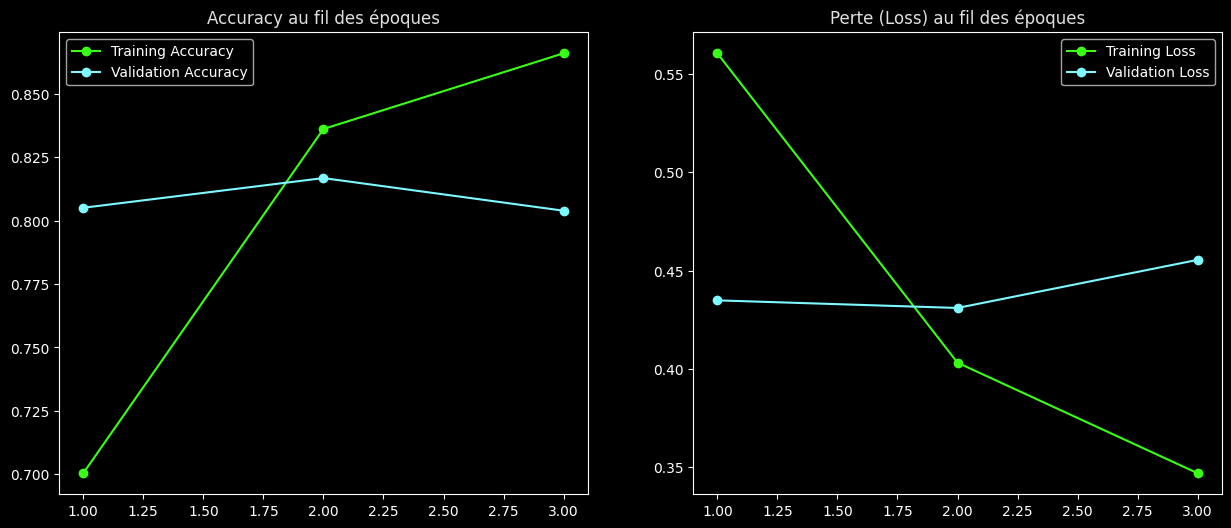

In [ ]:
# Évaluation finale sur le jeu de test
score_lstm = model_lstm.evaluate(x_test_pad, y_test, verbose=0)
print(f"Perte sur le jeu de test (Loss) : {score_lstm[0]:.4f}")
print(f"Précision sur le jeu de test (Accuracy) : {score_lstm[1]*100:.2f}%")

# On réutilise notre fonction pour tracer les courbes
def plot_history(history):
    plt.style.use('dark_background')
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    ax1.plot(epochs, acc, label='Training Accuracy', color='#39FF14', marker='o')
    ax1.plot(epochs, val_acc, label='Validation Accuracy', color='#7DF9FF', marker='o')
    ax1.set_title('Accuracy au fil des époques', color='#E0E0E0')
    ax1.legend()

    ax2.plot(epochs, loss, label='Training Loss', color='#39FF14', marker='o')
    ax2.plot(epochs, val_loss, label='Validation Loss', color='#7DF9FF', marker='o')
    ax2.set_title('Perte (Loss) au fil des époques', color='#E0E0E0')
    ax2.legend()

    plt.show()

plot_history(history_lstm)

### Faisons une prédiction sur une critique personnalisée !

Maintenant, le test ultime : donnons-lui nos propres phrases pour voir comment il réagit.

In [ ]:
# Fonction pour prédire le sentiment d'une nouvelle phrase
def predict_sentiment(text):
    # Prétraitement du texte
    # 1. Tokenization : convertir les mots en entiers
    sequence = [word_index.get(word, 2) for word in text.lower().split()]
    # 2. Padding
    padded_sequence = pad_sequences([sequence], maxlen=MAX_LEN, padding='post', truncating='post')

    # Prédiction
    prediction = model_lstm.predict(padded_sequence)[0][0]

    # Interprétation
    sentiment = "Positif" if prediction > 0.5 else "Négatif"
    print(f"Critique : '{text}'")
    print(f"Score de Positivité : {prediction:.4f}")
    print(f"Sentiment Prédit : {sentiment}\n")

# Testons !
predict_sentiment("This movie was absolutely fantastic, a masterpiece of cinema.")
predict_sentiment("I have never seen such a boring and predictable plot in my entire life.")
predict_sentiment("The acting was great but the story was a complete mess.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Critique : 'This movie was absolutely fantastic, a masterpiece of cinema.'
Score de Positivité : 0.3422
Sentiment Prédit : Négatif

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step
Critique : 'I have never seen such a boring and predictable plot in my entire life.'
Score de Positivité : 0.4277
Sentiment Prédit : Négatif

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
Critique : 'The acting was great but the story was a complete mess.'
Score de Positivité : 0.8309
Sentiment Prédit : Positif



---
## ✅ Conclusion de la Quête n°2

**Incroyable ! Notre deuxième artefact est prêt.**

Nous avons forgé une Voix Artificielle, un LSTM, capable de lire et de comprendre le sentiment derrière le langage humain.

**Ce que nous avons appris :**
- Le défi des séquences de longueur variable et comment le **padding** le résout.
- La puissance de l'**Embedding** pour donner un sens aux mots.
- Le rôle du **LSTM** pour capturer le contexte et la mémoire à long terme.

Nous avons maintenant un Œil et une Voix. La dernière quête nous attend : les unir pour accomplir une tâche encore plus grande.